<a href="https://colab.research.google.com/github/jonnymon3217/PHYS3025WorkjonnyMoore9real/blob/main/hw/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Python standard library
import time
import warnings


# Third-party software
import numpy as np

# Astropy
from astropy.table import Table

# Astroquery. This tutorial requires 0.3.5 or greater.
!pip install astroquery #note we need to install it manually using !pip install
import astroquery
from astroquery.vizier import Vizier


# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
v=Vizier(columns =['Vmag','B-V','Plx','e_Plx','SpType'], column_filters={'VMag':'!=','B-V':'!=','Plx':'!=','e_Plx':'!=','SpType':'!='},row_limit=-1)
result = v.query_constraints(catalog='V/137D')
table= result[0]


In [17]:
table_clean=table[table['e_Plx']/table['Plx']<0.05]

In [21]:
dist=1/(table_clean['Plx']*10**-3)
Mv=-5*np.log10(dist)+table_clean['Vmag']+5


<ipython-input-21-e0e3b65143bf>:2: RuntimeWarning: invalid value encountered in log10
  Mv=-5*np.log10(dist)+table_clean['Vmag']+5


Text(0, 0.5, 'visual mag')

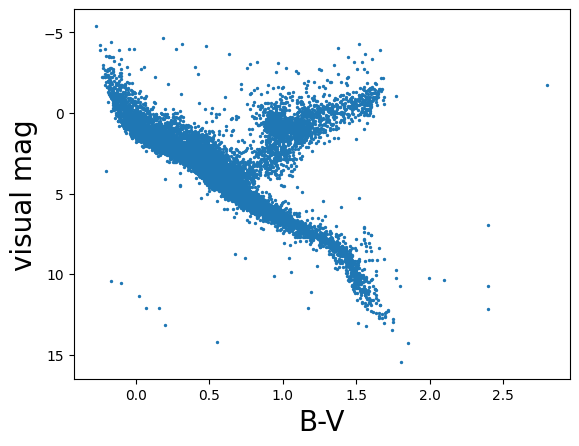

In [23]:
plt.scatter(table_clean["B-V"],Mv,s=2)
plt.ylim(reversed(plt.ylim())) # flip the y-axis
plt.xlabel("B-V", fontsize=20)
plt.ylabel("visual mag", fontsize=20)